In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
#from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
from google.colab import files
files.upload()


Output hidden; open in https://colab.research.google.com to view.

# Data exploration 




In [5]:
df = pd.read_csv('/content/fulltable.csv')
df.head()

,patientunitstayid,apacheadmissiondx,unittype,apache_iv,aniongap_min,aniongap_max,albumin_min,albumin_max,bands_min,bands_max,...,avg_spo2,avg_nibp_systolic,avg_nibp_diastolic,avg_nibp_mean,avg_temperature,avg_ibp_systolic,avg_ibp_diastolic,avg_ibp_mean,IMC,dialysis
0,254141,"Sepsis, unknown",Med-Surg ICU,57.0,10.0,21.0,2.9,4.2,1.0,8.0,...,95.977778,102.826772,57.771654,75.515873,37.225200,NaN,NaN,NaN,30.452052,1
1,264460,"Pneumonia, bacterial",Med-Surg ICU,73.0,18.0,18.0,3.9,3.9,NaN,NaN,...,98.469534,138.348337,39.477495,75.633205,37.020590,NaN,NaN,NaN,27.426389,1
2,431561,"Respiratory - medical, other",Med-Surg ICU,103.0,8.0,17.0,1.0,1.9,NaN,NaN,...,99.206522,108.111111,56.555556,68.296296,36.190123,117.757377,53.590164,75.770492,35.112165,1
3,441673,"Sepsis, other",Med-Surg ICU,120.0,14.0,17.0,2.7,2.9,8.0,8.0,...,99.361446,98.910180,61.155689,69.886228,36.847059,NaN,NaN,NaN,23.732181,1
4,441947,"Neoplasm-cranial, surgery for (excluding trans...",Neuro ICU,48.0,8.0,10.0,2.8,2.8,NaN,NaN,...,95.907104,128.712871,66.326733,79.651163,37.280226,132.203125,58.645833,77.875648,38.876608,1


In [6]:
df['dialysis'].value_counts()

0    18198
1     1153
Name: dialysis, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


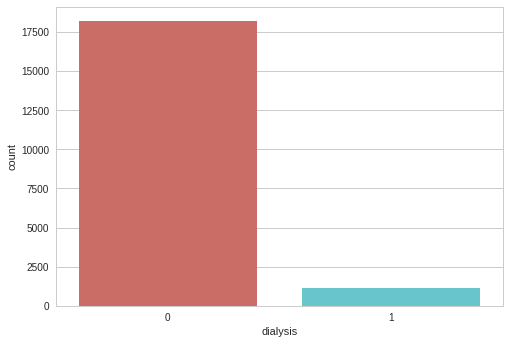

In [0]:
sns.countplot(x='dialysis', data=df, palette='hls')
plt.show()


In [0]:
df.groupby(['dialysis']).count()

,patientunitstayid,apacheadmissiondx,unittype,apache_iv,aniongap_min,aniongap_max,albumin_min,albumin_max,bands_min,bands_max,...,avg_respiratoryrate,avg_spo2,avg_nibp_systolic,avg_nibp_diastolic,avg_nibp_mean,avg_temperature,avg_ibp_systolic,avg_ibp_diastolic,avg_ibp_mean,IMC
dialysis,,,,,,,,,,,,,,,,,,,,,
0,18198,17997,18198,15619,14501,14501,14534,14534,3279,3279,...,16808,15130,16785,16784,15646,17558,4506,4499,5399,17390
1,1153,1122,1153,949,978,978,962,962,211,211,...,1151,1116,1140,1140,1145,1153,650,648,648,1098


We will perform a random undersampling to try to make a better analysis

In [0]:
df.describe()

,patientunitstayid,apache_iv,aniongap_min,aniongap_max,albumin_min,albumin_max,bands_min,bands_max,bicarbonate_min,bicarbonate_max,...,avg_spo2,avg_nibp_systolic,avg_nibp_diastolic,avg_nibp_mean,avg_temperature,avg_ibp_systolic,avg_ibp_diastolic,avg_ibp_mean,IMC,dialysis
count,1.935100e+04,16568.000000,15479.000000,15479.000000,15496.000000,15496.000000,3490.000000,3490.000000,18375.000000,18375.000000,...,16246.000000,17925.000000,17924.000000,16791.000000,18711.000000,5156.000000,5147.000000,6047.000000,18488.000000,19351.000000
mean,1.815968e+06,72.465295,10.703618,15.273564,2.731748,3.051549,10.531819,14.316559,20.075331,24.278259,...,96.350307,120.075126,64.105902,78.810209,36.773721,116.822457,57.715184,78.158625,321.062244,0.059583
std,1.081759e+06,29.185288,4.704200,6.658700,0.721019,0.733738,11.375109,13.956083,6.166048,5.468000,...,2.938926,18.467062,11.008272,12.709101,0.569275,19.965021,10.766386,13.721678,10479.031234,0.236720
min,1.412660e+05,-1.000000,1.000000,1.000000,0.400000,0.400000,0.500000,0.500000,1.000000,3.000000,...,2.000000,46.500000,17.000000,28.000000,26.700000,2.000000,1.000000,1.000000,0.130166,0.000000
25%,8.379000e+05,53.000000,7.000000,11.000000,2.200000,2.500000,3.000000,4.000000,16.000000,21.000000,...,95.365436,106.811321,56.616635,69.942179,36.555556,105.301190,51.000000,70.320022,24.076499,0.000000
50%,1.650372e+06,68.000000,10.000000,14.000000,2.700000,3.100000,6.960000,10.000000,20.000000,24.000000,...,96.698503,118.238095,63.375000,77.424242,36.773333,115.809733,56.900000,76.880952,28.506451,0.000000
75%,3.000114e+06,88.000000,13.000000,18.300000,3.200000,3.600000,14.975000,20.000000,24.000000,27.000000,...,97.951574,132.000000,70.628897,86.274295,37.025092,128.481009,64.000000,85.026901,34.713090,0.000000
max,3.353254e+06,211.000000,48.000000,66.000000,7.600000,7.600000,97.400000,97.400000,51.000000,77.000000,...,100.000000,218.000000,127.000000,170.000000,41.000000,300.000000,121.200000,238.500000,725551.020408,1.000000


In [0]:
#unfilter unittype
tmp_df = df["lactate_min"]
print(tmp_df.head(25))
print(tmp_df.isna().sum()/df.describe()['patientunitstayid']['count'])
tmp_df.isna().sum()

0      1.3
1      NaN
2      0.4
3      3.0
4      2.4
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     3.2
13     0.8
14     NaN
15    13.3
16     NaN
17     NaN
18     6.1
19     NaN
20     1.7
21     0.4
22     1.0
23     1.3
24     5.7
Name: lactate_min, dtype: float64
0.4152240194305204


8035

In [0]:
#patientunitstayid eliminada por no aportar ninguna informacion
#lactate_min 41% NaN
#lactate_max 41% NaN
#avg_fio2 41% NaN
#hco3_min 45% NaN
#hco3_max 45% NaN
#avg_dopamine 95% NaN
#avg_dobutamine 97% NaN
#avg_norepinephrine 66% NaN
#avg_ibp_systolic 73% NaN
#avg_ibp_mean 69% NaN
#bands_min 82% NaN
#bands_max 82% NaN
data = df.filter(['dialysis','age','gender','bicarbonate_min', 'bicarbonate_max', 'creatinine_min', 'creatinine_max', 'chloride_min', 'chloride_max', 'glucose_min', 'glucose_max', 'hematocrit_min', 'hematocrit_max', 'hemoglobin_min', 'hemoglobin_max', 'potassium_min', 'potassium_max', 'sodium_min', 'sodium_max', 'bun_min', 'bun_max'],axis=1)
df_filtered = df.drop(['hosp_mortality','patientunitstayid','unittype','apacheadmissiondx','lactate_min','lactate_max','avg_fio2','hco3_min','hco3_max','avg_dopamine','avg_dobutamine','avg_norepinephrine','avg_ibp_systolic','avg_ibp_diastolic','avg_ibp_mean','bands_min','bands_max'], axis=1)

In [18]:
df_filtered.isna().sum()

apache_iv              2783
aniongap_min           3872
aniongap_max           3872
albumin_min            3855
albumin_max            3855
bicarbonate_min         976
bicarbonate_max         976
bilirubin_min          4640
bilirubin_max          4640
creatinine_min          383
creatinine_max          383
chloride_min            484
chloride_max            484
glucose_min             462
glucose_max             462
hematocrit_min          578
hematocrit_max          578
hemoglobin_min          671
hemoglobin_max          671
potassium_min           426
potassium_max           426
sodium_min              369
sodium_max              369
bun_min                 383
bun_max                 383
age                       1
gender                    5
icu_los_hours             0
avg_pao2               7296
avg_outputtotal        3161
avg_urineoutput        3161
avg_heartrate          1199
avg_respiratoryrate    1392
avg_spo2               3105
avg_nibp_systolic      1426
avg_nibp_diastolic  

In [0]:
df_filtered1 = data.dropna(how='any')

In [20]:
print(len(df_filtered1))

17979


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


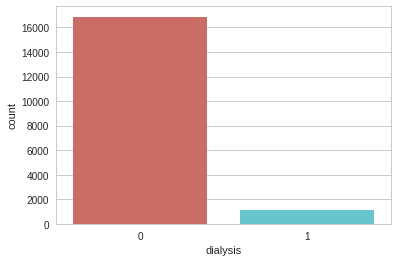

In [21]:
sns.countplot(x='dialysis', data=df_filtered1, palette='hls')
plt.show()


Text(0,0.5,'Frequency of dialysis')

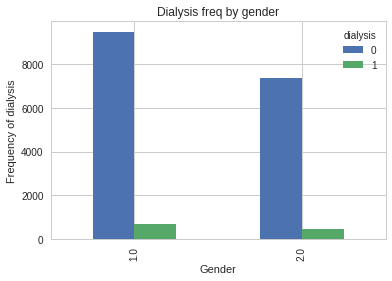

In [25]:
%matplotlib inline
pd.crosstab(df_filtered1.gender,df_filtered1.dialysis).plot(kind='bar')
plt.title('Dialysis freq by gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of dialysis')


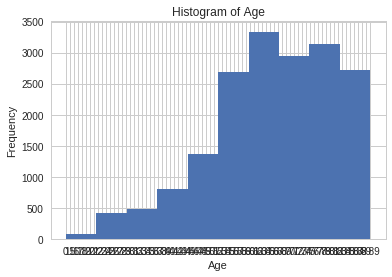

In [26]:
df_filtered1.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [27]:
'''
float              float64
int                  int64
datetime    datetime64[ns]
string              object
'''
df_filtered1.dtypes


dialysis             int64
age                 object
gender             float64
bicarbonate_min    float64
bicarbonate_max    float64
creatinine_min     float64
creatinine_max     float64
chloride_min       float64
chloride_max       float64
glucose_min        float64
glucose_max        float64
hematocrit_min     float64
hematocrit_max     float64
hemoglobin_min     float64
hemoglobin_max     float64
potassium_min      float64
potassium_max      float64
sodium_min         float64
sodium_max         float64
bun_min            float64
bun_max            float64
dtype: object

In [0]:
#df_filtered1['age'] = df_filtered1['age'].apply(pd.to_numeric, errors ='coerce')

df_filtered1 = df_filtered1.apply(pd.to_numeric, errors ='coerce')


In [0]:
df_filtered1 = df_filtered1.dropna(how='any')


In [0]:
# Class count
count_class_0, count_class_1 = df_filtered1.dialysis.value_counts()

# Divide by class
df_class_0 = df_filtered1[df_filtered1['dialysis'] == 0]
df_class_1 = df_filtered1[df_filtered1['dialysis'] == 1]

Random under-sampling:
1    1104
0    1104
Name: dialysis, dtype: int64


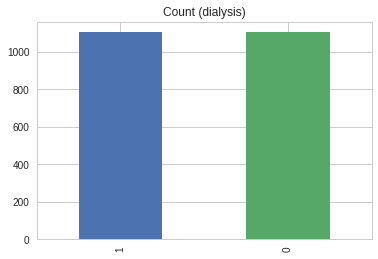

In [46]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.dialysis.value_counts())

df_test_under.dialysis.value_counts().plot(kind='bar', title='Count (dialysis)');

In [32]:
df_test_under.shape

(2208, 21)

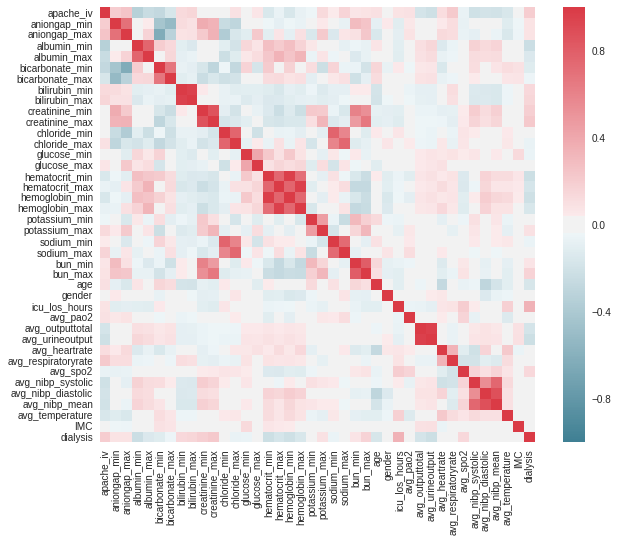

In [0]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df_test_under.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [0]:
#We will perform a Random under-sampling to make better prediction
y=df_test_under['dialysis']
X=df_test_under.drop('dialysis',axis=1)

# Split the data into Training and Testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


In [50]:
y_train

5301     0
550      1
3906     0
339      1
705      1
6727     0
1736     0
139      1
14216    0
5629     0
12522    0
118      1
1139     1
16458    0
414      1
7994     0
9549     0
1252     0
14730    0
7252     0
784      1
22       1
983      1
1210     0
1152     1
1118     1
659      1
746      1
207      1
15404    0
        ..
106      1
14093    0
15789    0
4486     0
19311    0
2209     0
10726    0
15454    0
1136     1
943      1
8254     0
798      1
985      1
3655     0
5694     0
1106     1
870      1
1062     1
13626    0
624      1
1077     1
9752     0
755      1
703      1
14528    0
8902     0
656      1
1275     0
13637    0
573      1
Name: dialysis, Length: 1545, dtype: int64

In [0]:
#Recursive Feature Elimination


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[False  True  True  True  True  True False False  True  True  True False
  True False False False False  True  True  True  True  True  True  True
 False  True  True False False False False False False  True False False
 False  True False]
[ 4  1  1  1  1  1 12  2  1  1  1 10  1 19 17  5 16  1  1  1  1  1  1  1
  3  1  1  9 14 18 13  6 15  1 11  7  8  1 20]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print(list(df_filtered1.columns))


['apache_iv', 'aniongap_min', 'aniongap_max', 'albumin_min', 'albumin_max', 'bicarbonate_min', 'bicarbonate_max', 'bilirubin_min', 'bilirubin_max', 'creatinine_min', 'creatinine_max', 'chloride_min', 'chloride_max', 'glucose_min', 'glucose_max', 'hematocrit_min', 'hematocrit_max', 'hemoglobin_min', 'hemoglobin_max', 'potassium_min', 'potassium_max', 'sodium_min', 'sodium_max', 'bun_min', 'bun_max', 'age', 'gender', 'icu_los_hours', 'hosp_mortality', 'avg_pao2', 'avg_outputtotal', 'avg_urineoutput', 'avg_heartrate', 'avg_respiratoryrate', 'avg_spo2', 'avg_nibp_systolic', 'avg_nibp_diastolic', 'avg_nibp_mean', 'avg_temperature', 'IMC', 'dialysis']


[False False  True  True  True  True False  True  True  True False False
  True False False False  True  True  True  True  True  True  True  True
 False  True  True False False False False False False False  True False
 False False  True False]
[ 3 10  1  1  1  1  7  1  1  1 16 17  1 20 19  6  1  1  1  1  1  1  1  1
  2  1  1  8  9 15 18 12 14  5  1 13  4 11  1 21]
  
  

In [0]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.468238
         Iterations 7
                          Results: Logit
Model:               Logit             No. Iterations:    7.0000   
Dependent Variable:  dialysis          Pseudo R-squared:  0.324    
Date:                2019-01-12 09:28  AIC:               988.3811 
No. Observations:    970               BIC:               1183.4729
Df Model:            39                Log-Likelihood:    -454.19  
Df Residuals:        930               LL-Null:           -672.35  
Converged:           1.0000            Scale:             1.0000   
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
apache_iv            0.0071   0.0033  2.1308 0.0331  0.0006  0.0136
aniongap_min        -0.0127   0.0396 -0.3210 0.7482 -0.0904  0.0649
aniongap_max        -0.1020   0.0339 -3.0

# Start to apply prediction algorithms

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
#dataset = pd.read_csv('/Users/uxuelazkanodobao/Documents/DATATHON/iris.csv')

# Any results you write to the current directory are saved as output.

In [35]:
df_filtered1.columns

Index(['dialysis', 'age', 'gender', 'bicarbonate_min', 'bicarbonate_max',
       'creatinine_min', 'creatinine_max', 'chloride_min', 'chloride_max',
       'glucose_min', 'glucose_max', 'hematocrit_min', 'hematocrit_max',
       'hemoglobin_min', 'hemoglobin_max', 'potassium_min', 'potassium_max',
       'sodium_min', 'sodium_max', 'bun_min', 'bun_max'],
      dtype='object')

In [0]:
#Creo que esto no está bien, hay que hacer un fit del scaler con los datos train y luego aplicar ese scaler a todo el resto
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [38]:
#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
#Set up cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 (+/- 0.04)


In [0]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [0]:
# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [42]:
# Making the confusion matrix 
from sklearn import metrics
print (metrics.accuracy_score(y_test,classifier.predict(x_test)))

0.6892911010558069


In [43]:
#Improve the technique of logistic regression
predict_prob_df=pd.DataFrame(classifier.predict_proba(x_test))
predict_prob_df.head(5)

,0,1
0,0.618156,0.381844
1,0.742468,0.257532
2,0.546874,0.453126
3,0.754779,0.245221
4,0.303588,0.696412


# SVM-Support Vector Machine for Classification


In [51]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_test, y_test) * 100, 2)
acc_svc
scores = cross_val_score(svc, x_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.50 (+/- 0.00)


In [55]:
x_test

,age,gender,bicarbonate_min,bicarbonate_max,creatinine_min,creatinine_max,chloride_min,chloride_max,glucose_min,glucose_max,hematocrit_min,hematocrit_max,hemoglobin_min,hemoglobin_max,potassium_min,potassium_max,sodium_min,sodium_max,bun_min,bun_max
15450,68.0,1.0,21.0,27.0,1.13,1.31,102.0,106.0,226.0,365.0,36.0,37.2,11.7,12.7,3.90,4.7,136.0,138.0,20.0,24.0
11794,63.0,1.0,18.0,21.0,1.56,1.91,99.0,99.0,225.0,337.0,32.8,39.7,11.1,13.6,4.80,5.6,130.0,133.0,22.0,25.0
459,63.0,1.0,27.0,27.0,3.40,3.40,109.0,109.0,79.0,79.0,32.0,32.0,11.1,11.1,3.40,4.0,147.0,147.0,66.0,66.0
14286,39.0,2.0,16.0,17.0,1.04,1.55,100.0,102.0,380.0,559.0,44.0,48.4,14.9,16.0,4.40,6.3,133.0,137.0,16.0,24.0
96,78.0,1.0,15.0,20.0,1.90,4.70,107.0,111.0,65.0,197.0,24.4,31.1,7.8,10.4,3.60,4.8,136.0,144.0,30.0,69.0
9558,63.0,1.0,16.0,21.0,0.78,2.98,98.0,109.0,86.0,139.0,25.7,41.5,8.4,13.3,3.30,5.1,126.0,136.0,6.0,36.0
318,62.0,2.0,16.0,28.0,0.70,2.10,100.0,112.0,73.0,183.0,17.0,38.0,5.8,12.4,3.70,6.0,135.0,151.0,16.0,30.0
18947,54.0,2.0,17.0,28.0,1.80,7.90,87.0,96.0,101.0,208.0,25.8,29.8,8.4,9.9,3.70,5.7,125.0,132.0,20.0,40.0
5746,64.0,1.0,18.0,24.0,1.20,1.36,102.0,106.0,134.0,211.0,38.1,41.4,12.6,13.9,3.50,4.8,138.0,144.0,16.0,20.0
5108,71.0,1.0,24.0,24.0,1.70,1.70,115.0,115.0,183.0,183.0,35.2,35.2,11.7,11.7,4.00,4.0,143.0,143.0,26.0,26.0


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  0 335]
 [  0 328]]


In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, svc.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

AttributeError: ignored

In [0]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_test, y_test) * 100, 2)
acc_linear_svc
scores = cross_val_score(linear_svc, x_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.74 (+/- 0.04)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Logistic regression

In [0]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = 'l2', C =10 )
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_test, y_test) * 100, 2)
acc_log
scores = cross_val_score(logreg, x_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.75 (+/- 0.04)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[113  31]
 [ 40 107]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


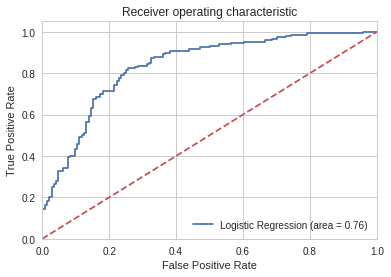

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

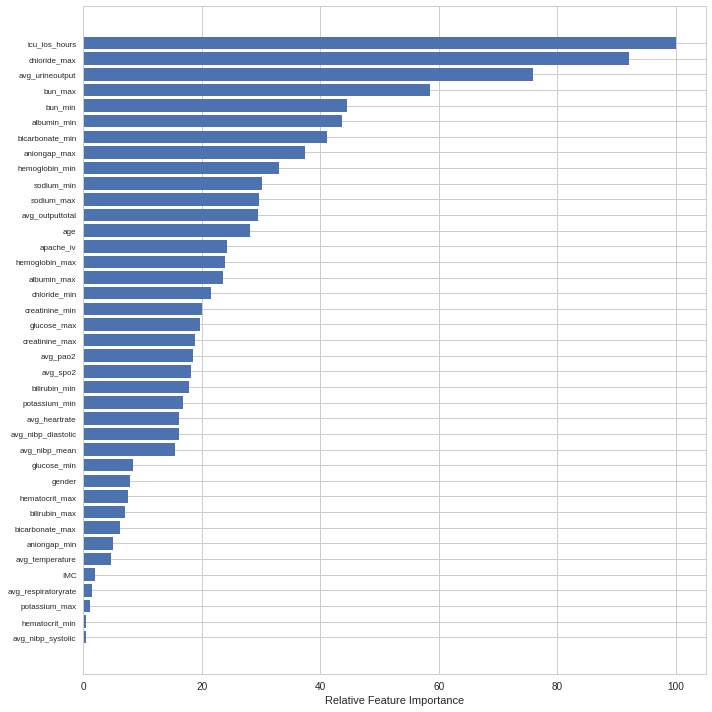

In [0]:

feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#from sklearn.learning_curve import validation_curve


C_param_range = [0.001,0.01,0.1,1,10,100]

acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(10, 10))

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(x_train,y_train)
    
    # Predict using model
    y_pred = lr.predict(x_test)
    
    # Saving accuracy score in table
    acc_table.iloc[j,1] = accuracy_score(y_test,y_pred)
    j += 1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
acc_table

,C_parameter,Accuracy
0,0.001,0.745704
1,0.010,0.75945
2,0.100,0.762887
3,1.000,0.762887
4,10.000,0.769759
5,100.000,0.769759


# KNN - K Nearest Neighbour Prediction


In [0]:
#KNN - K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
acc_knn
scores = cross_val_score(knn, x_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.64 (+/- 0.07)


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[100  44]
 [ 49  98]]


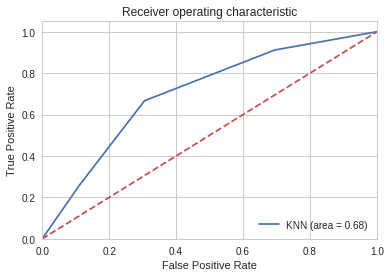

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Gaussian Naive Bayes

In [0]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_test, y_test) * 100, 2)
acc_gaussian
scores = cross_val_score(gaussian, x_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.69 (+/- 0.09)


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[114  30]
 [ 61  86]]


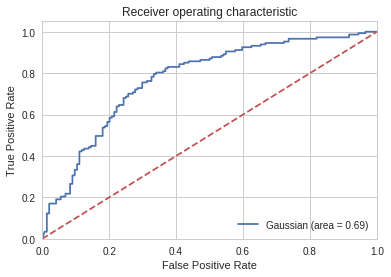

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gaussian.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, gaussian.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Perceptron Model/Algorithm analysis

In [0]:
# Perceptron
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_test, y_test) * 100, 2)
acc_perceptron
scores = cross_val_score(perceptron, x_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.62 (+/- 0.09)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If to

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[93 51]
 [55 92]]


In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Perceptron Model (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: ignored

# Stochastic Gradient Descent

In [0]:
# Stochastic Gradient Descent
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc_sgd = round(clf.score(x_test, y_test) * 100, 2)
acc_sgd
scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 (+/- 0.11)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[98 46]
 [51 96]]


In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Stochastic Gradient Descent (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

AttributeError: ignored

# Decision Tree Algorithm 

In [0]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree
scores = cross_val_score(decision_tree, x_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.66 (+/- 0.03)


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[102  42]
 [ 68  79]]


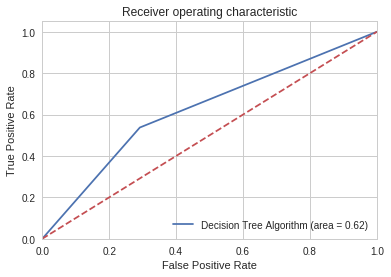

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, decision_tree.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, decision_tree.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Algorithm (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [0]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)
acc_random_forest
scores = cross_val_score(random_forest, x_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.75 (+/- 0.05)


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[108  36]
 [ 32 115]]


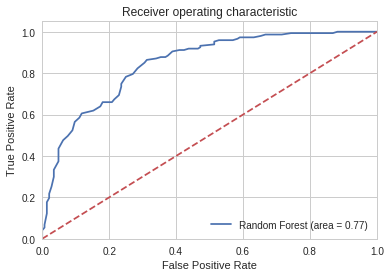

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, random_forest.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model evaluation 



In [0]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              ],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,77.66
3,Random Forest,76.63
2,Logistic Regression,76.29
7,Linear SVC,76.29
4,Naive Bayes,68.73
1,KNN,68.04
6,Stochastic Gradient Decent,66.67
5,Perceptron,63.57


In [0]:
#Build a model to predict y using x1,x2 and x3. Note down R-Square and Adj R-Square values 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

In [0]:
import statsmodels.formula.api as sm
model = sm.ols(formula='hosp_mortality ~ patientunitstayid+outputtotal+urineoutput+heartrate+respiratoryrate+spo2+nibp_systolic+nibp_diastolic+nibp_mean+temperature+ibp_systolic+ibp_diastolic+ibp_mean+age+gender+icu_los_hours', data=dataset)
fitted1 = model.fit()
fitted1.summary()

NameError: ignored

Feature ranking:
1. feature 27 (0.116862)
2. feature 31 (0.095498)
3. feature 10 (0.068758)
4. feature 30 (0.056347)
5. feature 9 (0.037138)
6. feature 15 (0.032000)
7. feature 0 (0.029496)
8. feature 25 (0.028733)
9. feature 17 (0.027395)
10. feature 24 (0.024986)
11. feature 34 (0.023910)
12. feature 3 (0.023676)
13. feature 16 (0.022103)
14. feature 29 (0.021943)
15. feature 38 (0.021590)
16. feature 39 (0.021048)
17. feature 32 (0.020339)
18. feature 37 (0.020089)
19. feature 35 (0.019504)
20. feature 18 (0.019395)
21. feature 36 (0.018030)
22. feature 23 (0.017960)
23. feature 5 (0.016288)
24. feature 20 (0.016087)
25. feature 6 (0.015908)
26. feature 13 (0.015780)
27. feature 14 (0.015748)
28. feature 12 (0.015392)
29. feature 33 (0.015224)
30. feature 4 (0.015159)
31. feature 2 (0.014044)
32. feature 21 (0.013584)
33. feature 8 (0.013345)
34. feature 22 (0.013199)
35. feature 19 (0.012839)
36. feature 1 (0.012471)
37. feature 11 (0.011752)
38. feature 7 (0.011159)
39. feature 28

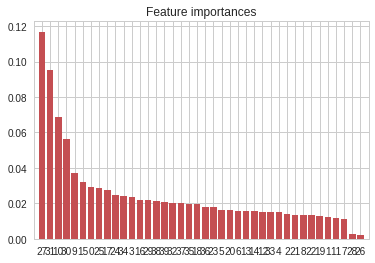

In [0]:
importances = random_forest.feature_importances_
std = np.std([importances for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [0]:
feature_importances = pd.DataFrame(random_forest.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
icu_los_hours,0.112574
avg_urineoutput,0.071524
creatinine_max,0.055221
hematocrit_min,0.038273
hemoglobin_min,0.036469
avg_outputtotal,0.033650
creatinine_min,0.033138
bun_max,0.030785
age,0.027975
avg_pao2,0.025686


In [0]:
from sklearn.metrics import roc_auc_score
y_pred = random_forest.predict(x_test)
dfpred = pd.DataFrame(y_pred)
roc_auc_score(y_test, y_pred)
dfpred[0].value_counts()


1    151
0    140
Name: 0, dtype: int64